# [ KUIAI, AI해커톤 ] 데이터셋1_사출 성형 최적 조건 분석을 위한 사출성형기 데이터분석
- 주관 및 지원 : 고려대학교, 한국산업기술진흥원, 한국전자연구기술원 
- 후원 : TachYon Tech
- 팀명 : White-box
- 팀원 : 한양대학교 ERICA 고유미, 노지영, 유동완, 이시현


# 0.도메인지식

## 도메인 지식으로 살펴 본, 중요한 features 
### 불량현상과 원인
  * 쇼트숏(Shot Shot) : 금형 내 원료 플라스틱의 충전량이 부족해서 
    * 발생 원인: 원료 공급불량, 충전압력 부족, 금형 내 유동중의 원료고화, 금형 내 공기저항


  * 싱크마크(Sink Mark): 성형품 표면에 발생하는 함몰현상
    * 발생 원인: 금형내 압축된 용융 플라스틱 온도 저하에 의한 체적의 감소, 압력 저하

  * 광택불량과 흐름(Dull Surface): 성형품의 표면이 일면에 광택이 나쁘게 되기도 하고 무색 투명품에서 유백의 흐림을 일으키는 현상
    * 발생 원인: 금형면에 플라스틱이 충분히 압착되지 못함, 노즐로부터 배출된 가스, 금형이 과다하게 도포한 이형제

  * 기포(Bubble): 성형품 내부에 공동을 일으키는 현상
    * 발생 원인: 노즐로부터 방출된 다량의 가스, 금형 내 용융 플라스틱에 충분히 작용하지 못한 압력

###궁극적 원인 

  * 압력: 금형 내 용융 플라스틱에 충분히 가해지지 않은 압력, 충전압력, 금형 내 공기저항
    * Injection_Time: 고압(사출압)(재료를 금형에 유입시킬때의 압력) + 사출시간
    * Cushion_Position: 보압(금형내부압력을 조절하여 과충전을 방지)을 하기 위한 스크류의 위치
    * Switch_Over_Position: 고압, 보압절환위치(고압에서 보압으로 진행될때의 위치)
    * Max_Injection_Pressure: 배럴에 계량되어 있는 용융수지가 금형으로 흘러들어가는데 가해지는 최대 압력
    * Max_Switch_Over_Pressure: 사출에서 보압(충전된 수지가 밀리지않게 압력을 줌)으로 변환되는 압력

  * 온도: 금형 내 압축된 용융 플라스틱의 온도 저하
    * Barrel_Temperature: 계량 및 사출시 수지가 일정하게 용융을 유지하기위한 온도(일정해야함)

  * 금형면과 플라스틱의 압착 정도: 성형품에 빈틈부가 있는 경우
    * Clamp_Close_Time: 제품이 생산되고 난 후 열려있는 금형을 사출기가 닫아주고 빈틈없이 고정축과 이동축을 꽉 잡아주는데 걸리는 시간

  * 용융 플라스틱의 유출: 금형의 성형품 주입부 이외의 부분으로 용융 플라스틱 유출
    * Max_Back_Pressure: 수지가 계량이 되는중에 스크류가 밀려나는 현상을 저지하기위한 최대 압력
    * Average_Back_Pressure: 수지가 계량이 되는중에 스크류가 밀려나는 현상을 저지하기위한 평균 압력

  * 원료의 공급 불량
    * Filling_Time: 충전시간으로 사출기에서 금형으로 내용물이 주입되는 시간
    * Plasticizing_Position: 계량완료위치(계량을 마친 스크류의 위치)


# 1.데이터탐색

## 1.1 라이브러리, 데이터셋 로드

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
label_data = pd.read_csv('./labeled_data.csv')
label_data

,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,Reason,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24.0,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.47,16.920000,59.520000,7.13,653.409973,0.0,68.849998,647.98999,55.400002,30.700001,292.500000,141.800003,136.800003,37.400002,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,0.0,66.300003,0.0,0.0,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24.0,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23.0,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,68.839996,647.98999,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,0.0,67.199997,0.0,0.0,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23.0,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24.0,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,68.839996,647.98999,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,0.0,66.900002,0.0,0.0,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,5fa112859c0189cc66dabe34,2020-11-03 08:17:36,2020-11-03 오전 12:00:00,6.0,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.620001,59.560001,7.11,653.429993,0.0,68.330002,647.98999,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,276.500000,274.899994,275.100006,269.500000,255.600006,229.600006,0.0,66.099998,0.0,0.0,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8662,5fa112869c0189cc66dabe42,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,7.0,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,275.799988,275.299988,275.500000,270.700012,254.899994,230.000000,0.0,66.099998,0.0,0.0,21.000000,22.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8663,5fa112879c0189cc66dabe50,2020-11-03 08:18:37,2020-11-03 오전 12:00:00,6.0,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,Y,None,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,68.349998,647.98999,55.000000,30.70000

## 1.2 데이터 타입 확인

In [ ]:
# 호기 종류 및 해당 데이터 수 확인 -> '650톤-우진2호기'만 사용
label_data['EQUIP_NAME'].value_counts()

650톤-우진2호기    8661
650톤-우진          2
1800TON-우진       2
56.0             1
Name: EQUIP_NAME, dtype: int64

In [ ]:
# 제품 종류 확인 -> CN7과 RG3만 사용
label_data['PART_NAME'].value_counts() 

CN7 W/S SIDE MLD'G RH        3706
CN7 W/S SIDE MLD'G LH        3699
RG3 MOLD'G W/SHLD, RH         628
RG3 MOLD'G W/SHLD, LH         628
SP2 CVR ROOF RACK CTR, RH       2
JX1 W/S SIDE MLD'G RH           2
142.6999969482422               1
Name: PART_NAME, dtype: int64

##1.3 기술통계량 확인

기술 통계량을 확인한 결과,
- 필요없는 feature들을 제거해야함.: ex) mean 값이 모두 0인 데이터
 

In [ ]:
label_data.describe()

,PART_FACT_SERIAL,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_1,Mold_Temperature_2,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
count,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8665.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.000000,8664.0,8664.0,8664.000000,8664.000000,8664.0,8664.0,8664.0,8664.0,8664.0,8664.0,8664.0,8664.0
mean,10.914436,8.378140,3.973291,16.269182,59.896346,7.093958,653.334525,0.312536,66.223265,552.190309,65.986972,30.701592,139.722548,142.150070,133.587526,40.499665,59.586822,277.290699,276.532010,276.299388,271.025924,256.391228,230.703279,0.008403,66.371203,0.0,0.0,22.093121,23.485919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5.810548,4.229837,3.268155,3.119620,2.370107,2.446662,12.025238,14.095520,5.288239,228.789478,25.614132,0.372310,129.682370,2.859706,7.403424,6.669058,3.392980,7.227059,5.763948,4.946345,2.585969,3.707955,1.880663,0.553009,2.498659,0.0,0.0,1.157634,1.325580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2.000000,1.050000,0.930000,10.920000,58.840000,5.160000,0.000000,0.000000,0.000000,0.000000,22.299999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,239.600006,235.300003,220.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.000000,9.520000,4.400000,16.580000,59.520000,7.110000,653.429993,0.000000,68.250000,647.989990,55.099998,30.600000,29.200001,141.800003,136.100006,37.700001,59.400002,275.899994,275.000000,274.899994,269.799988,254.899994,229.899994,0.000000,65.300003,0.0,0.0,21.299999,22.700001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,9.560000,4.450000,16.790001,59.520000,7.120000,653.429993,0.000000,68.339996,647.989990,55.500000,30.700001,29.200001,142.100006,136.500000,38.000000,59.599998,276.200012,275.399994,275.000000,270.700012,255.000000,230.100006,0.000000,66.500000,0.0,0.0,22.000000,23.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,12.000000,9.590000,4.480000,16.889999,59.560001,7.120000,653.440002,0.000000,68.489998,647.989990,56.000000,30.799999,292.399994,142.199997,136.800003,38.400002,59.900002,276.600006,275.700012,275.399994,271.399994,255.300003,230.199997,0.000000,67.500000,0.0,0.0,22.799999,24.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,290.500000,285.299988,285.299988,276.200012,265.600006,234.500000,655.080017,655.309998,68.860001,883.700012,128.500000,31.200001,293.899994,183.199997,146.699997,75.199997,90.800003,287.100006,286.500000,285.799988,276.799988,270.399994,264.299988,36.400002,70.599998,0.0,0.0,25.299999,27.799999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
label_data['Mold_Temperature_1'].value_counts()

0.0    8664
Name: Mold_Temperature_1, dtype: int64

## 1.4 Input함수 구현
- make_input : Input data 형태로 만들기 위해 구현한 함수

In [ ]:
def make_input(data, machine_name ,product_name):
    machine_ = data['EQUIP_NAME'] == machine_name
    product_ = data['PART_NAME'] == product_name
    data = data[machine_ & product_]
    
    # 불필요하다고 판단된 columns
    data.drop([#'Unnamed: 0', 'PART_NO',
               '_id','TimeStamp','PART_FACT_PLAN_DATE', 'Reason',
               #'ERR_FACT_QTY',
               'PART_FACT_SERIAL','PART_NAME','EQUIP_CD', 'EQUIP_NAME',
               # mean=0인거 제거
               'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_5', 'Mold_Temperature_6', 'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11', 'Mold_Temperature_12'], 
              axis=1, inplace=True)
    return data

## 1.5 제품별로 데이터셋 분리
- product : cn7 / rg3

In [ ]:
machine_name = "650톤-우진2호기"
product_name = ["CN7 W/S SIDE MLD'G LH", "CN7 W/S SIDE MLD'G RH", "RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]

# "650톤-우진2호기'의 "CN7 W/S SIDE MLD'G LH" 데이터만 변수를 제거하여 가져옴
cn7lh = make_input(label_data, machine_name, product_name[0])
# "650톤-우진2호기'의 "CN7 W/S SIDE MLD'G RH" 데이터만 변수를 제거하여 가져옴
cn7rh = make_input(label_data, machine_name, product_name[1])
# "650톤-우진2호기'의 “RG3 MOLD’G W/SHLD, LH” 데이터만 변수를 제거하여 가져옴
rg3lh = make_input(label_data, machine_name, product_name[2])
# "650톤-우진2호기'의 “RG3 MOLD’G W/SHLD, RH” 데이터만 변수를 제거하여 가져옴
rg3rh = make_input(label_data, machine_name, product_name[3])

# 동일한 제품의 LH와 RH는 합쳐줌
cn7 = pd.concat([cn7lh, cn7rh], ignore_index=True)
rg3 = pd.concat([rg3lh, rg3rh], ignore_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#2.데이터전처리(제품 별로 진행)


## 2.1 CN7

### 1단계) 피쳐타입변경 

양품 -> 0, 불량품 -> 1

In [ ]:
cn7['PassOrFail'] = cn7['PassOrFail'].replace('Y', 0).replace('N', 1)

### 2단계) 다중공선성문제를 유발할 수 있는 피쳐들을 선별적으로 제거

상관관계 확인 & heatmap

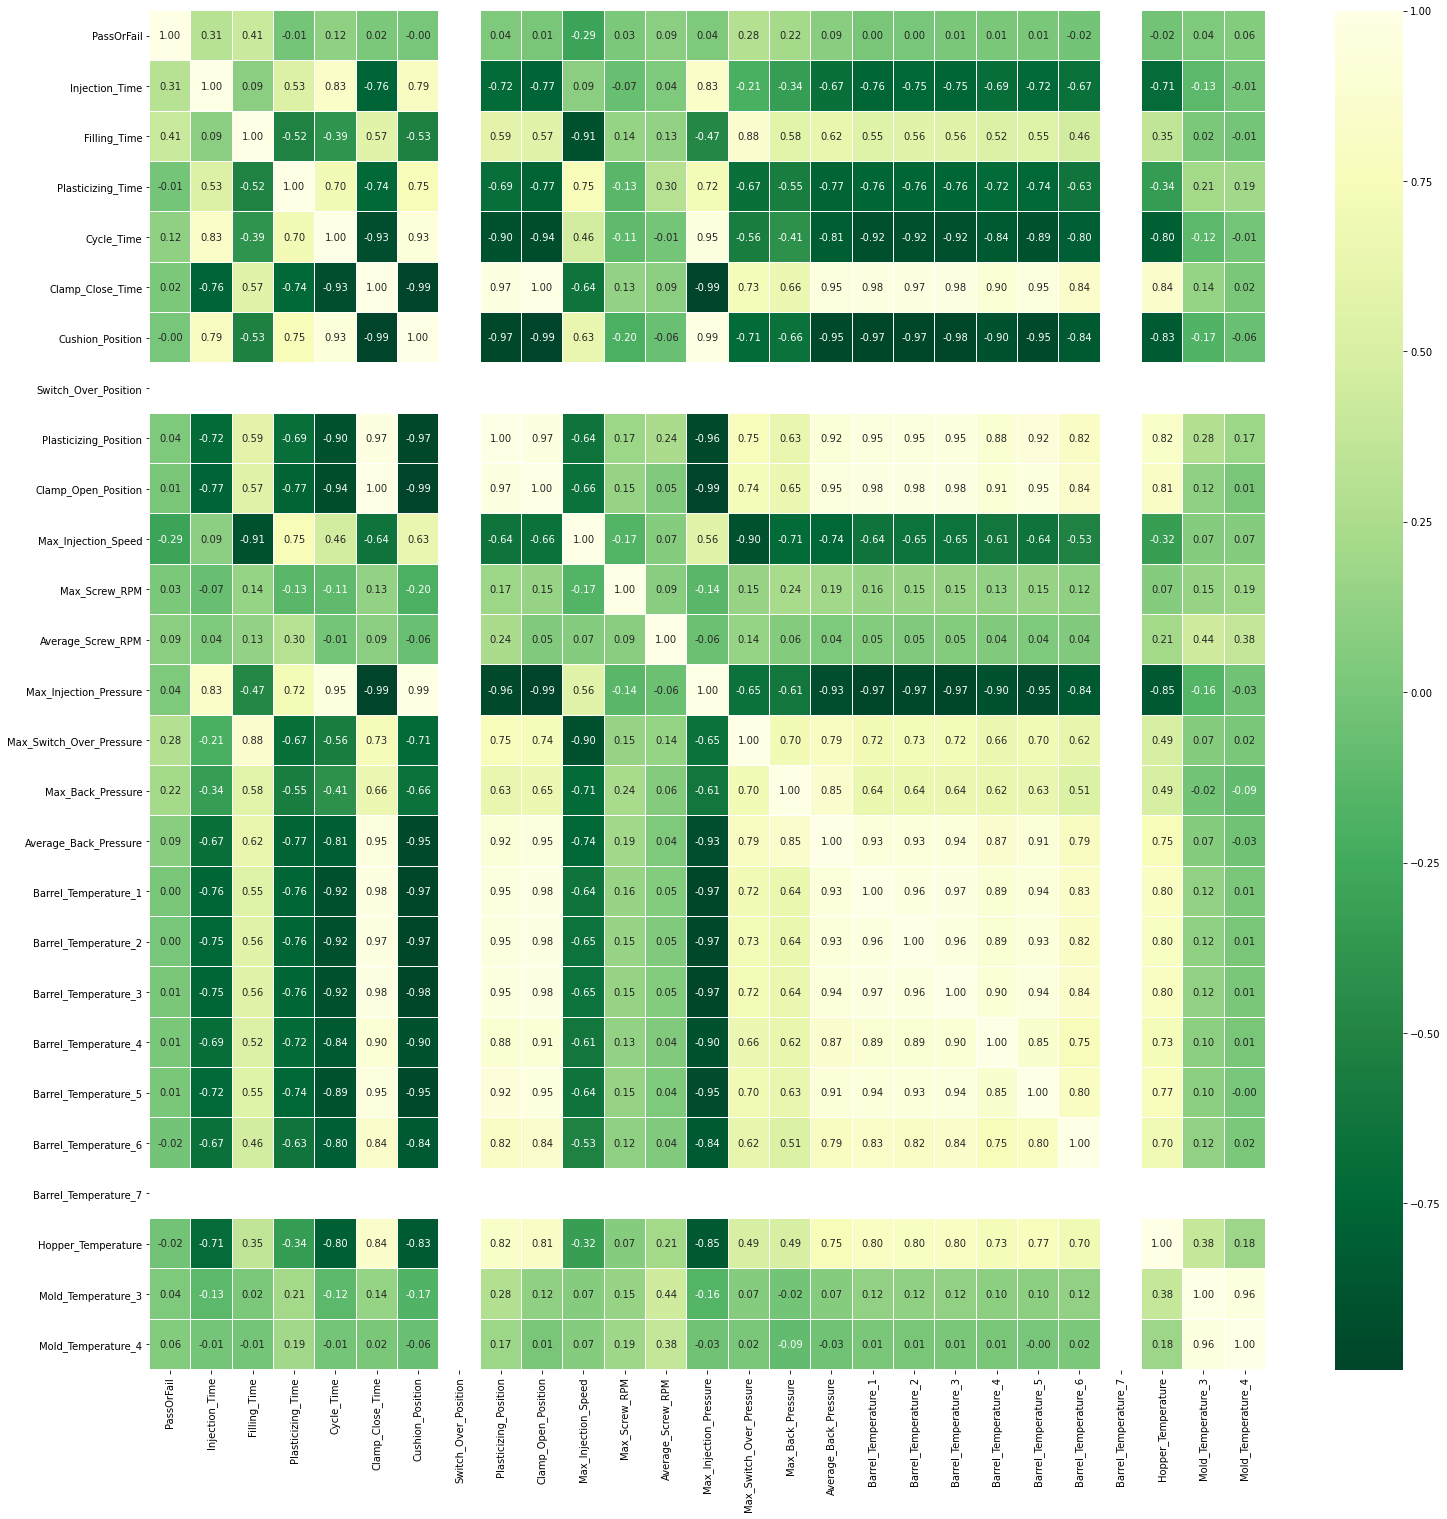

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = cn7.corr(),linewidths=0.1,annot=True, fmt = '.2f', cmap='YlGn_r')


절댓값 0.8 이상의 강한 상관관계를 가진 피쳐 확인 후, 선별적으로 제거 : 가장 그물망을 넓게 걸치고 있는 변수를 정하기로 함 (경험적 근거)

In [ ]:
cn7_corr_df = cn7.corr()
cn7_corr_df_nan = cn7_corr_df[cn7_corr_df > abs(0.8)]

cn7_corr_df_nan

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
PassOrFail,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Injection_Time,NaN,1.000000,NaN,NaN,0.829454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.831468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Filling_Time,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plasticizing_Time,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cycle_Time,NaN,0.829454,NaN,NaN,1.000000,NaN,0.932177,NaN,NaN,NaN,NaN,NaN,NaN,0.954403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clamp_Close_Time,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.972307,0.995790,NaN,NaN,NaN,NaN,NaN,NaN,0.950066,0.975649,0.973749,0.979064,0.902732,0.950223,0.842192,NaN,0.839427,NaN,NaN
Cushion_Position,NaN,NaN,NaN,NaN,0.932177,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.991124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Switch_Over_Position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plasticizing_Position,NaN,NaN,NaN,NaN,NaN,0.972307,NaN,NaN,1.000000,0.969094,NaN,NaN,NaN,NaN,NaN,NaN,0.919726,0.951054,0.949209,0.954324,0.879177,0.923013,0.817559,NaN,0.821569,NaN,NaN
Clamp_Open_Position,NaN,NaN,NaN,NaN,NaN,0.995790,NaN,NaN,0.969094,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.952897,0.979971,0.979041,0.983235,0.907335,0.954741,0.844692,NaN,0.814917,NaN,NaN


In [ ]:
col_names = list(cn7_corr_df_nan)
row_names = list(cn7_corr_df_nan.index)
result = []
for i in range(0, len(col_names)):
  for j in range(0,len(row_names)):
    value = []
    if ( (cn7_corr_df_nan[col_names[i]][row_names[j]] > 0.8) & (cn7_corr_df_nan[col_names[i]][row_names[j]] < 1 )) :
      value.append(col_names[i])
      value.append(row_names[j])
      value.append(cn7_corr_df_nan[col_names[i]][row_names[j]])
      result.append(value)
result

[['Injection_Time', 'Cycle_Time', 0.8294544564359526],
 ['Injection_Time', 'Max_Injection_Pressure', 0.8314683068115127],
 ['Filling_Time', 'Max_Switch_Over_Pressure', 0.8751050002395625],
 ['Cycle_Time', 'Injection_Time', 0.8294544564359526],
 ['Cycle_Time', 'Cushion_Position', 0.932177145114745],
 ['Cycle_Time', 'Max_Injection_Pressure', 0.9544032402701064],
 ['Clamp_Close_Time', 'Plasticizing_Position', 0.9723068115381945],
 ['Clamp_Close_Time', 'Clamp_Open_Position', 0.9957903579586369],
 ['Clamp_Close_Time', 'Average_Back_Pressure', 0.9500656939994712],
 ['Clamp_Close_Time', 'Barrel_Temperature_1', 0.9756486760200298],
 ['Clamp_Close_Time', 'Barrel_Temperature_2', 0.9737488539628902],
 ['Clamp_Close_Time', 'Barrel_Temperature_3', 0.9790643571625436],
 ['Clamp_Close_Time', 'Barrel_Temperature_4', 0.9027324239764115],
 ['Clamp_Close_Time', 'Barrel_Temperature_5', 0.9502228384477284],
 ['Clamp_Close_Time', 'Barrel_Temperature_6', 0.842192104509984],
 ['Clamp_Close_Time', 'Hopper_Temp

In [ ]:
result2 = pd.DataFrame(result)
result3 = result2.drop_duplicates([2], keep="first")
a = result3[0].value_counts()
a0=pd.DataFrame(a)
b = result3[1].value_counts()
b0=pd.DataFrame(b)
c = pd.concat([a0,b0], ignore_index=True, axis=1)
c = c.fillna(0)
c['sum'] = c[0]+c[1]
c

,0,1,sum
Clamp_Close_Time,10.0,0.0,10.0
Plasticizing_Position,9.0,1.0,10.0
Clamp_Open_Position,8.0,2.0,10.0
Average_Back_Pressure,5.0,4.0,9.0
Barrel_Temperature_1,5.0,4.0,9.0
Barrel_Temperature_2,4.0,5.0,9.0
Barrel_Temperature_3,4.0,6.0,10.0
Cycle_Time,2.0,1.0,3.0
Injection_Time,2.0,0.0,2.0
Cushion_Position,1.0,1.0,2.0


In [ ]:
c = c.sort_values(by=['sum'], axis=0, ascending=False)
c

,0,1,sum
Clamp_Close_Time,10.0,0.0,10.0
Clamp_Open_Position,8.0,2.0,10.0
Barrel_Temperature_3,4.0,6.0,10.0
Plasticizing_Position,9.0,1.0,10.0
Average_Back_Pressure,5.0,4.0,9.0
Barrel_Temperature_1,5.0,4.0,9.0
Barrel_Temperature_2,4.0,5.0,9.0
Barrel_Temperature_5,1.0,8.0,9.0
Barrel_Temperature_4,1.0,7.0,8.0
Barrel_Temperature_6,0.0,7.0,7.0


- 여러 변수에 그물망처럼 엮여 있는 피쳐 6개 제거 후보
  * : Clamp_Close_Time, Clamp_Open_Position,    Barrel_Temperature_1, Barrel_Temperature_2, 
Barrel_Temperature_3, Plasticizing_Position 
- 도메인 지식을 이용하여, Clamp_Close_Time 은 변수제거하지않기로함. 
- CN7에서 지워지는 변수의 개수 5개, 총 27개에서 22개로변화


In [ ]:
drop_cols_cn7 = ['Clamp_Open_Position', 'Barrel_Temperature_1', 'Barrel_Temperature_2', 'Barrel_Temperature_3', 'Plasticizing_Position']
new_cn7 = cn7.drop(drop_cols_cn7, axis=1) # 열 5개 제거 이유 : 다중공선성 문제를 일으킬 것 같은 피쳐들
new_cn7

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Injection_Pressure,Max_Switch_Over_Pressure,Max_Back_Pressure,Average_Back_Pressure,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0,9.60,4.48,16.910000,59.580002,7.13,653.409973,0.0,55.299999,30.799999,292.500000,141.800003,136.899994,37.500000,59.299999,270.799988,254.699997,229.500000,0.0,67.199997,24.799999,27.600000
1,0,9.59,4.48,16.910000,59.560001,7.13,653.419983,0.0,55.299999,31.000000,292.500000,141.800003,136.800003,37.500000,59.299999,271.100006,254.899994,230.000000,0.0,66.900002,25.000000,27.600000
2,0,9.58,4.46,16.900000,59.580002,7.13,653.409973,0.0,55.599998,30.900000,292.500000,141.699997,136.399994,37.700001,59.400002,271.399994,255.000000,230.000000,0.0,67.500000,25.000000,27.600000
3,0,9.58,4.46,16.920000,59.560001,7.13,653.409973,0.0,55.500000,30.600000,292.399994,141.800003,136.699997,37.400002,59.299999,271.299988,255.000000,230.000000,0.0,67.000000,25.000000,27.600000
4,0,9.57,4.45,16.910000,59.520000,7.14,653.409973,0.0,55.700001,30.799999,292.500000,141.600006,136.399994,37.099998,59.099998,270.799988,255.399994,230.100006,0.0,66.699997,24.799999,27.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,0,9.58,4.46,16.670000,59.520000,7.11,653.429993,0.0,55.200001,30.600000,29.200001,142.199997,136.399994,37.900002,59.700001,269.500000,255.000000,230.199997,0.0,66.000000,21.000000,22.400000
7401,0,9.60,4.49,16.650000,59.540001,7.11,653.429993,0.0,54.900002,30.799999,29.200001,142.100006,136.899994,38.099998,59.799999,269.700012,254.600006,229.600006,0.0,65.400002,21.000000,22.400000
7402,0,9.60,4.48,16.620001,59.560001,7.11,653.429993,0.0,54.900002,30.700001,29.200001,142.100006,137.000000,38.299999,59.900002,269.500000,255.600006,229.600006,0.0,66.099998,21.000000,22.400000
7403,0,9.60,4.48,16.650000,59.560001,7.11,653.429993,0.0,55.000000,30.700001,29.200001,142.100006,136.800003,38.400002,59.900002,270.700012,254.899994,230.000000,0.0,66.099998,21.000000,22.400000


In [ ]:
new_cn7.to_csv('new_cn7.csv', index=False)

### 3단계) 양품, 불량품 데이터 분리

In [ ]:
new_cn7['PassOrFail'].value_counts()

0    7365
1      40
Name: PassOrFail, dtype: int64

In [ ]:
# 양품
cn7_Y = new_cn7[new_cn7['PassOrFail']==0]
print('CN7의 양품 개수:', len(cn7_Y))

# 불량
cn7_N = new_cn7[new_cn7['PassOrFail']==1]
print('CN7의 불량 개수:', len(cn7_N))

CN7의 양품 개수: 7365
CN7의 불량 개수: 40


In [ ]:
# 양품
cn7_Y.drop(['PassOrFail'] ,axis=1, inplace=True)

# 불량
cn7_N.drop(['PassOrFail'] ,axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 4단계) 스케일링
- MinMaxScaler()사용

In [ ]:
scaler = MinMaxScaler()

# 양품
cn7_Y = scaler.fit_transform(cn7_Y)

# 불량
cn7_N = scaler.fit_transform(cn7_N)

### 5단계) train test 분리
: train에는 양품데이터만 존재해야함.

In [ ]:
cn7_train_Y = cn7_Y[:4000]
cn7_test_Y = cn7_Y[4000:]
cn7_test_N = cn7_N

## 2.2 RG3

### 1단계) 피쳐타입변경 

양품 -> 0, 불량품 -> 1

In [ ]:
rg3['PassOrFail'] = rg3['PassOrFail'].replace('Y', 0).replace('N', 1)

### 2단계) 다중공선성문제를 유발할 수 있는 피쳐들을 선별적으로 제거

상관관계 확인 & heatmap

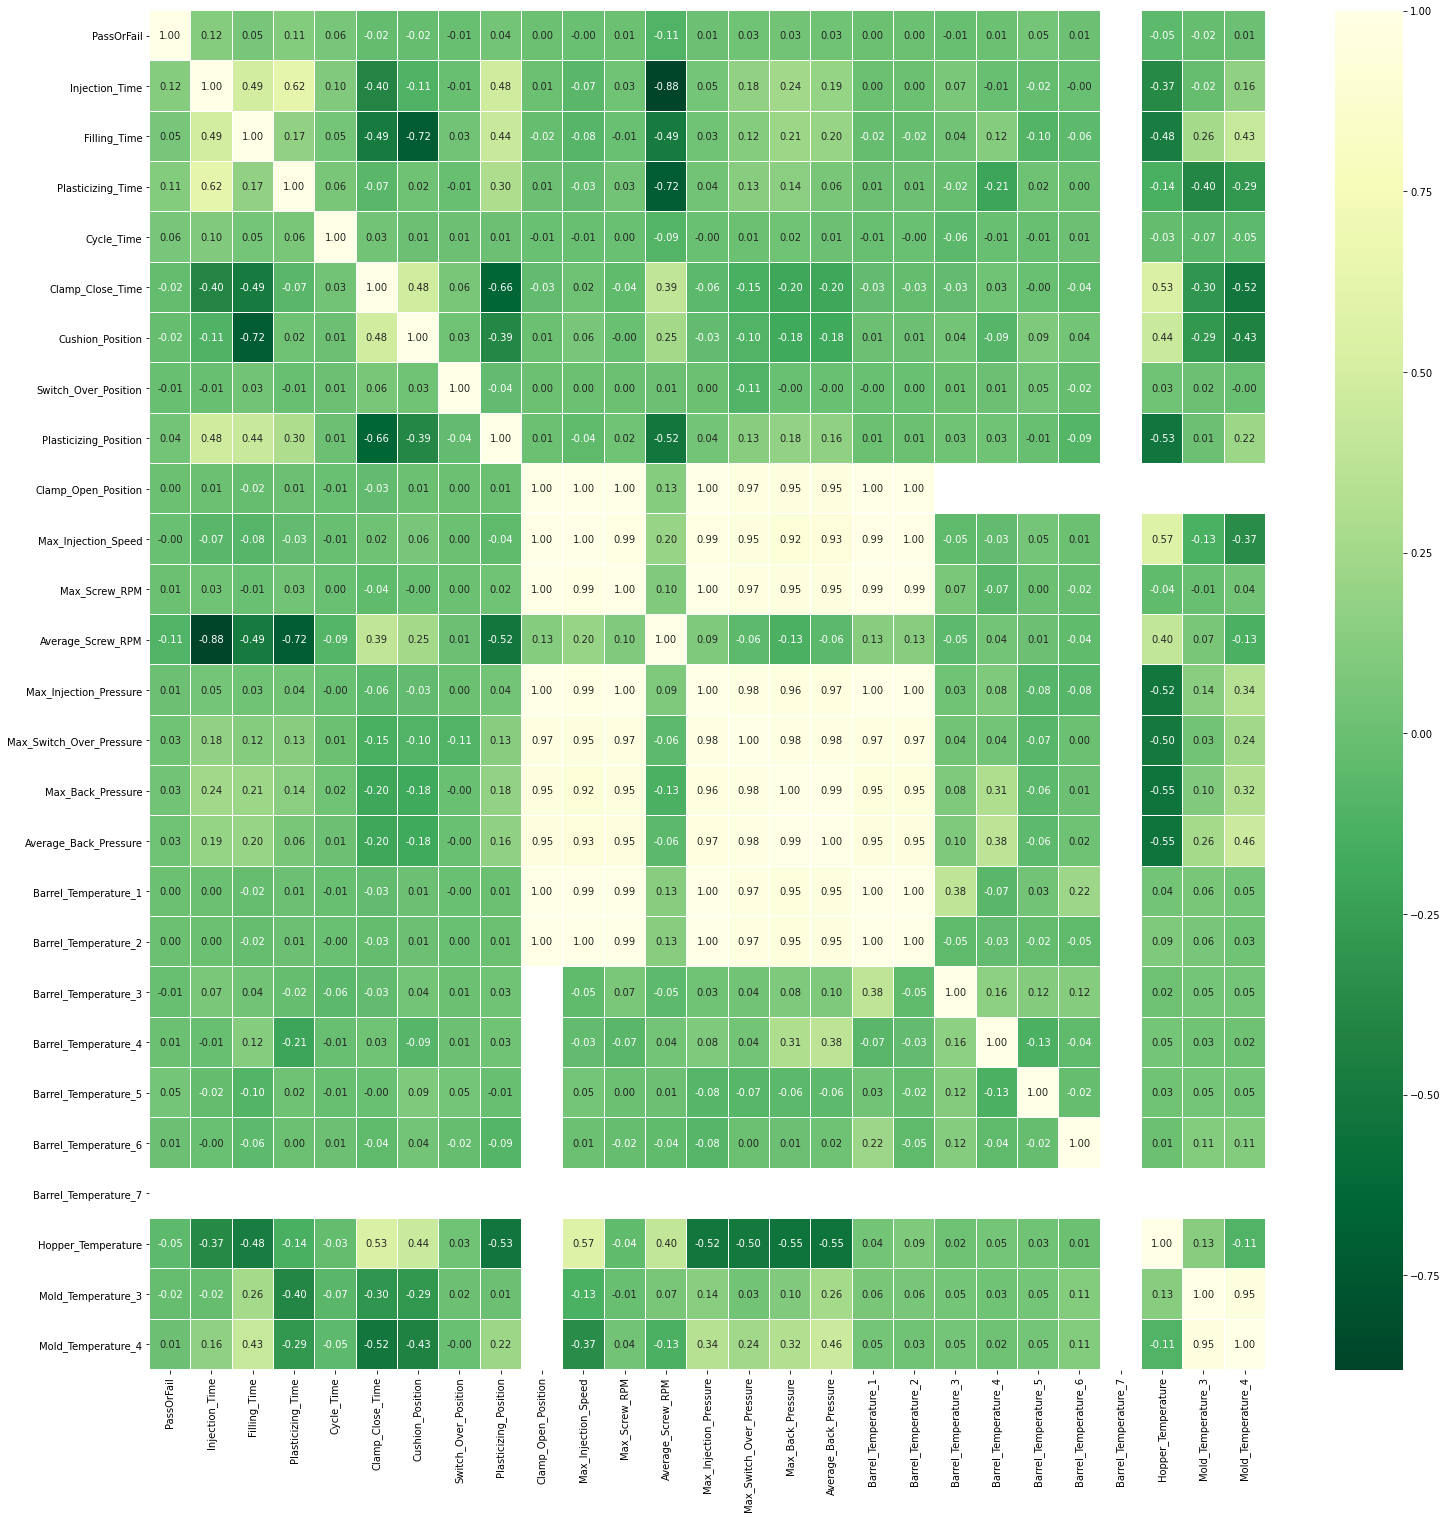

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = rg3.corr(),linewidths=0.1,annot=True, fmt = '.2f', cmap='YlGn_r')


절댓값 0.8 이상의 강한 상관관계를 가진 피쳐 확인 후, 선별적으로 제거 : 가장 그물망을 넓게 걸치고 있는 변수를 정하기로 함 (경험적 근거)

In [ ]:
corr_df = rg3.corr()
cor_df_nan = corr_df[corr_df > abs(0.8)]
col_names = list(cor_df_nan)
row_names = list(cor_df_nan.index)
result = []
for i in range(0, len(col_names)):
  for j in range(0,len(row_names)):
    value = []
    if ( (cor_df_nan[col_names[i]][row_names[j]] > 0.8) & (cor_df_nan[col_names[i]][row_names[j]] < 1 )) :
      value.append(col_names[i])
      value.append(row_names[j])
      value.append(cor_df_nan[col_names[i]][row_names[j]])
      result.append(value)

result2 = pd.DataFrame(result)
result3 = result2.drop_duplicates([2], keep="first")
a = result3[0].value_counts()
a0=pd.DataFrame(a)
b = result3[1].value_counts()
b0=pd.DataFrame(b)
c = pd.concat([a0,b0], ignore_index=True, axis=1)
c = c.fillna(0)
c['sum'] = c[0]+c[1]
c = c.sort_values(by=['sum'], axis=0, ascending=False)
c

,0,1,sum
Clamp_Open_Position,8.0,0.0,8.0
Max_Injection_Speed,7.0,1.0,8.0
Max_Screw_RPM,6.0,2.0,8.0
Max_Injection_Pressure,5.0,3.0,8.0
Max_Switch_Over_Pressure,4.0,4.0,8.0
Max_Back_Pressure,3.0,5.0,8.0
Average_Back_Pressure,2.0,6.0,8.0
Barrel_Temperature_1,1.0,7.0,8.0
Barrel_Temperature_2,0.0,8.0,8.0
Mold_Temperature_3,1.0,0.0,1.0


In [ ]:
drop_cols_rg3 = ['Max_Back_Pressure', 'Max_Injection_Pressure']
new_rg3 = rg3.drop(drop_cols_rg3, axis=1) # 열 2개 제거 이유 : 다중공선성 문제를 일으킬 것 같은 피쳐들
new_rg3

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Switch_Over_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,Max_Screw_RPM,Average_Screw_RPM,Max_Switch_Over_Pressure,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Barrel_Temperature_7,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,0,1.06,0.93,13.01,61.779999,6.81,654.289978,0.0,53.560001,4.63,128.500000,30.900000,290.500000,115.699997,60.299999,286.000000,285.000000,285.000000,275.399994,265.100006,234.899994,0.0,65.800003,21.600000,22.500000
1,0,1.06,0.93,12.99,61.779999,6.81,654.280029,0.0,53.580002,4.63,128.500000,30.900000,290.500000,115.800003,60.500000,286.200012,285.799988,285.000000,275.600006,265.600006,234.800003,0.0,65.800003,21.500000,22.500000
2,0,1.06,0.93,12.95,61.759998,6.81,654.270020,0.0,53.560001,4.63,128.399994,30.900000,290.700012,116.000000,60.200001,286.500000,285.100006,285.000000,276.000000,265.100006,234.699997,0.0,65.900002,21.500000,22.500000
3,0,1.06,0.93,13.02,61.779999,6.81,654.270020,0.0,53.560001,4.63,128.399994,30.799999,290.600006,116.199997,60.400002,285.299988,285.500000,284.500000,276.000000,264.799988,234.800003,0.0,65.900002,21.600000,22.500000
4,0,1.06,0.93,12.97,61.779999,6.81,654.280029,0.0,53.560001,4.63,128.399994,30.900000,290.600006,116.199997,60.299999,286.299988,285.899994,285.600006,275.399994,265.000000,235.199997,0.0,65.800003,21.600000,22.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,0,1.07,0.94,13.06,61.779999,6.79,654.250000,0.0,53.610001,4.63,127.500000,31.100000,29.000000,118.500000,62.200001,285.600006,284.799988,285.399994,276.100006,265.399994,235.199997,0.0,64.400002,22.500000,24.200001
1252,0,1.07,0.94,13.07,61.759998,6.79,654.260010,0.0,53.610001,4.63,127.599998,30.799999,29.000000,118.400002,61.900002,285.600006,285.100006,285.000000,275.799988,264.899994,235.100006,0.0,64.599998,22.400000,24.200001
1253,0,1.07,0.94,13.09,61.740002,6.79,654.250000,0.0,53.619999,4.63,127.500000,30.799999,29.000000,118.199997,61.599998,286.200012,284.799988,285.100006,275.500000,265.000000,235.000000,0.0,63.000000,22.600000,24.400000
1254,0,1.07,0.94,13.12,61.779999,6.79,654.250000,0.0,53.610001,4.63,127.500000,31.100000,29.000000,118.300003,61.500000,285.899994,284.899994,285.700012,274.899994,265.000000,234.899994,0.0,64.500000,22.500000,24.299999


In [ ]:
new_rg3.to_csv('new_rg3.csv', index=False)

### 3단계) 양품, 불량품 데이터 분리

In [ ]:
new_rg3['PassOrFail'].value_counts()

0    1224
1      32
Name: PassOrFail, dtype: int64

In [ ]:
# 양품
rg3_Y = new_rg3[new_rg3['PassOrFail']==0]
print('rg3의 양품 개수:', len(rg3_Y))

# 불량
rg3_N = new_rg3[new_rg3['PassOrFail']==1]
print('rg3의 불량 개수:', len(rg3_N))

rg3의 양품 개수: 1224
rg3의 불량 개수: 32


In [ ]:
# 양품
rg3_Y.drop(['PassOrFail'] ,axis=1, inplace=True)

# 불량
rg3_N.drop(['PassOrFail'] ,axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 4단계) 스케일링
- MinMaxScaler()사용

In [ ]:
scaler = MinMaxScaler()

# 양품
rg3_Y = scaler.fit_transform(rg3_Y)

# 불량
rg3_N = scaler.fit_transform(rg3_N)

### 5단계) train test 분리
: train에는 양품데이터만 존재해야함.

In [ ]:
rg3_train_Y = rg3_Y[:800]
rg3_test_Y = rg3_Y[800:]
rg3_test_N = rg3_N

#3.데이터모델링(One Class SVM)

## 3.1 속도 검증

3.1은 속도 확인을 위해, 실행해봐도 좋은 함수입니다. <br> 속도를 확인하셨으면 다시 [4.1]로 가시면 됩니다.

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM

def drop_data(data):
    Nodata_list = ['_id', 'TimeStamp', 'PART_FACT_PLAN_DATE', 'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'Reason']
    statistic = pd.DataFrame(data.describe())
    
    for i in statistic.columns:
        if sum(statistic[i][1:]) == 0:
            Nodata_list.append(i)
    
    data.drop(Nodata_list, axis = 1, inplace=True)
    
    return data

def get_sachul():
    data = pd.read_csv('labeled_data.csv')
    data = data[data['EQUIP_NAME'] == '650톤-우진2호기']
    data['PassOrFail'] = data['PassOrFail'].replace('Y', 0).replace('N', 1)
    
    CN_list = ["CN7 W/S SIDE MLD'G RH", "CN7 W/S SIDE MLD'G LH"]
    RG_list = ["RG3 MOLD'G W/SHLD, LH", "RG3 MOLD'G W/SHLD, RH"]
    CN7 = data[data['PART_NAME'].apply(lambda x: x in CN_list)]
    RG3 = data[data['PART_NAME'].apply(lambda x: x in RG_list)]
    
    data_CN = drop_data(CN7)
    data_RG = drop_data(RG3)
    
    data_CN_Y = data_CN[data_CN['PassOrFail']==0]
    data_CN_N = data_CN[data_CN['PassOrFail']==1]
    
    data_CN_Y.drop('PassOrFail', axis = 1, inplace=True)
    data_CN_N.drop('PassOrFail', axis = 1, inplace=True)

    scaler = MinMaxScaler()
    data_CN_Y = scaler.fit_transform(data_CN_Y)
    data_CN_N = scaler.fit_transform(data_CN_N)
    
    CN_train = data_CN_Y[:4000]
    CN_Y_test = data_CN_Y[4000:]
    CN_N_test = data_CN_N
    
    return CN_train, CN_Y_test, CN_N_test

CN_train, CN_Y_test, CN_N_test = get_sachul()

start = time.time()
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
svm.fit(CN_train)
pred = svm.predict(CN_train)
CN_Y_predict = pd.Series(svm.predict(CN_Y_test)).replace(1, 0).replace(-1, 1)
CN_N_predict = pd.Series(svm.predict(CN_N_test)).replace(1, 0).replace(-1, 1)

print("time: ", time.time() - start)

time:  0.07674527168273926


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# 4.성능검증

## 4.1 CN7 + One Class SVM

In [ ]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
svmp = svm.fit(cn7_train_Y)
pred = svmp.predict(cn7_train_Y)
CN_Y_predict = pd.Series(svmp.predict(cn7_test_Y)).replace(1, 0).replace(-1, 1) # 예측값
CN_N_predict = pd.Series(svmp.predict(cn7_test_N)).replace(1, 0).replace(-1, 1) # 예측값

In [ ]:
from sklearn.metrics import confusion_matrix

cn7_true = np.concatenate([np.zeros(len(CN_Y_predict)), np.ones(len(CN_N_predict))])
cn7_prediction = list(np.concatenate([CN_Y_predict, CN_N_predict])) # 예측값 합한 변수
confusion_matrix(cn7_true, cn7_prediction)  #결과는 아래에서 확인 가능하다.

array([[3322,   43],
       [   0,   40]])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("정확도:", accuracy_score(cn7_true, cn7_prediction))
print("정밀도:", precision_score(cn7_true, cn7_prediction))
print("재현율:", recall_score(cn7_true, cn7_prediction))
print("F1:",f1_score(cn7_true, cn7_prediction)) #결과는 아래에서 확인 가능하다.
print("AUROC: ",roc_auc_score(cn7_true, cn7_prediction))

정확도: 0.9873715124816447
정밀도: 0.4819277108433735
재현율: 1.0
F1: 0.6504065040650406
AUROC:  0.9936106983655275


In [ ]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
svm = svm.fit(cn7_train_Y)
pred = svm.predict(cn7_test_Y)
CN_Y_predict = pd.Series(svm.predict(cn7_test_Y)).replace(1, 0).replace(-1, 1)
CN_N_predict = pd.Series(svm.predict(cn7_test_N)).replace(1, 0).replace(-1, 1)

시각화

## 4.2 RG3 + One Class SVM

In [103]:
svm2= OneClassSVM(kernel='rbf', gamma=0.001, nu=0.02)
svm2.fit(rg3_train_Y)
pred2 = svm2.predict(rg3_train_Y)
rg3_Y_predict = pd.Series(svm2.predict(rg3_test_Y)).replace(1, 0).replace(-1, 1)
rg3_N_predict = pd.Series(svm2.predict(rg3_test_N)).replace(1, 0).replace(-1, 1)

In [104]:
from sklearn.metrics import confusion_matrix

rg3_true = np.concatenate([np.zeros(len(rg3_Y_predict)), np.ones(len(rg3_N_predict))])
rg3_prediction = np.concatenate([rg3_Y_predict, rg3_N_predict])
confusion_matrix(rg3_true, rg3_prediction)  #결과는 아래에서 확인 가능하다.

array([[412,  12],
       [ 12,  20]])

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("정확도:", accuracy_score(rg3_true, rg3_prediction))
print("정밀도:", precision_score(rg3_true, rg3_prediction))
print("재현율:", recall_score(rg3_true, rg3_prediction))
print("F1:",f1_score(rg3_true, rg3_prediction)) #결과는 아래에서 확인 가능하다.
print("AUROC: ",roc_auc_score(rg3_true, rg3_prediction))

정확도: 0.9473684210526315
정밀도: 0.625
재현율: 0.625
F1: 0.625
AUROC:  0.7983490566037736
